# Marketing Campaign for Banking Products

The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


> ### Objective
> *   To predict the likelihood of a liability customer buying personal loans

## 1. Importing the dataset and the libraries, check the datatype, statistical summary of dataset.


### 1.1 Import the Dataset and Libraries

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading Dataset into Google Colab
# You can download the dataset from this link - https://www.kaggle.com/itsmesunil/bank-loan-modelling/download
# Then upload the dataset file in Google Colab by running the following code
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
# Get uploaded file name
file_name = ""
for key in uploaded.keys():
  file_name = key

In [4]:
# Getting the dataset into a variable
import io
bank_data = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [5]:
# Checking if the dataset is loaded properly (Top 10 values)
bank_data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
# Checking if the dataset is loaded properly (Bottom 10 values)
bank_data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


The given dataset consists of the data of 5000 bank customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan).

Our objective is to use this data to create a model that predict the likelihood of a customer buying a personal loan.

There are 14 attributes in this dataset - 

* **ID**: Customer ID
* **Age**: Customer's age in completed years
* **Experience**: # years of professional experience
* **Income**: Annual income of the customer
* **ZIP Code**: Home Address ZIP code
* **Family**: Family size of the customer
* **CCAvg**: Avg. spending on credit cards per month
* **Education**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **Mortgage**: Value of house mortgage if any
* **Personal Loan**: Did this customer accept the personal loan offered in the last campaign?
* **Securities Account**: Does the customer have a securities account with the bank?
* **CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?
* **Online**: Does the customer use internet banking facilities?
* **Credit card**: Does the customer use a credit card issued by the bank?

Here, the **Personal Loan** attribute is our target/output which we are trying to predict.

### 1.2 Checking the datatype and statistical summary of the dataset

In [7]:
# Checking the datatype of dataset, datatype of each attribute.
# Checking if there are any null values in any of the attributes in the dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# Statistical Summary of the dataset.
# This summary includes count of data for each attribute, mean of data for each attribute, 
# min and max of data for each attribute, etc.
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 2. Cleaning up of Data

When creating a model, it is necessary to remove noise from the dataset.

As we can see from the dataset, **ID** attribute is not relevent to the data we require to predict i.e. **Personal Loan**, so we can remove it.

Also, we can see from the Summary of the dataset that **Experience** attribute has some faulty data since there is a negetive **min** value which should not be possible. Now, since **Age** attribute and **Experience** attribute correlate, we can remove the **Experience** attribute.

In [9]:
# Checking if Age & Experience are correlated or not
exp = bank_data['Experience']
age = bank_data['Age']
correl = exp.corr(age)
correl

0.9942148569683321

Since correlation of **Age** attribute and **Experience** attribute is 0.99, we can say that **Age** attribute and **Experience** attribute are correlated.

Hence, as mentioned above, we can drop the **Experience** attribute as it has faulty data.

In [10]:
# Removing the noise i.e., ID and Experience attributes, from the dataset
bank_data = bank_data.drop(['ID', 'Experience'], axis=1)
bank_data.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [11]:
# Statistical Summary of the dataset after cleanup.
# This summary includes count of data for each attribute, mean of data for each attribute, 
# min and max of data for each attribute, etc.
bank_data.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


As we can see from the above summary of the dataset, there are, (for now) no faulty data or no noise present.

So we can now proceed with this data.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Number of unique in each column

In [12]:
# This code will give the number of unique values present in each column of the
# dataset
bank_data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

From the output of the code above, we can see that **ZIP Code** attribute has 467 unique values. This is a nominal value that has too many levels. If we use encoding, taking an example of One-Hot Encoding, we will have too many different columns and it will cause the problem of Multicollinearity as the new columns will highly depend on each other. So, to avoid this, we will drop the **ZIP Code** attribute from the dataset.

In [13]:
# Removing the ZIP Code attribute from the dataset
bank_data = bank_data.drop('ZIP Code', axis=1)
bank_data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


### 3.2 Number of customers with zero mortgage

In [14]:
# This code will give the number of customers having zero mortgage value
(bank_data['Mortgage'] == 0).sum()

3462

### 3.3 Number of custmers with zero credit card spending per month

In [15]:
# This code will give the number of customers having zero credit card spending
# per month
(bank_data['CCAvg'] == 0).sum()

106

### 3.4 Value counts of all categorical columns

In [16]:
# This code will give the number of customers in each unique value in the Family
# column. Here, there are 4 unique values [1, 2, 3, 4] which depicts the number
# of family members a customer has
bank_data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [17]:
# This code will give the number of customers in each unique value in the
# Education column. Here, there are 3 unique values [1, 2, 3] which depicts the
# level of education a customer has.
# Here, ["1: Undergrad", "2: Graduate", "3: Advanced/Professional"]
bank_data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [18]:
# This code will give the number of customers in each unique value in the
# CD Account column. Here, there are 2 unique values [0, 1] which depicts if the
# customer has a CD Account or not.
# Here, ["0: Doesn't Have", "1: Has"]
bank_data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [19]:
# This code will give the number of customers in each unique value in the
# Securities Account column. Here, there are 2 unique values [0, 1] which
# depicts if the customer has a Securities Account or not.
# Here, ["0: Doesn't Have", "1: Has"]
bank_data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [20]:
# This code will give the number of customers in each unique value in the
# CreditCard column. Here, there are 2 unique values [0, 1] which depicts if the
# customer uses the Credit Card or not.
# Here, ["0: Doesn't Use", "1: Uses"]
bank_data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [21]:
# This code will give the number of customers in each unique value in the
# Online column. Here, there are 2 unique values [0, 1] which depicts if the
# customer uses the Online Facility or not.
# Here, ["0: Doesn't Use", "1: Uses"]
bank_data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

### 3.5 Univariate Analysis

In Univariate Analysis, we analyse each of the attributes of the dataset. 

We have used Distribution Plots for Numerical Attributes like **Age**, **Income**, **CCAvg** and **Mortgage**.

We have used Pie Plots and Count Plots for the Catagorical Attributes like **Family**, **Education**, **Securities Account**, **CD Account**, **Online** and **CreditCard**.

In [22]:
# This code is used to set the size and theme of the graphs
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")

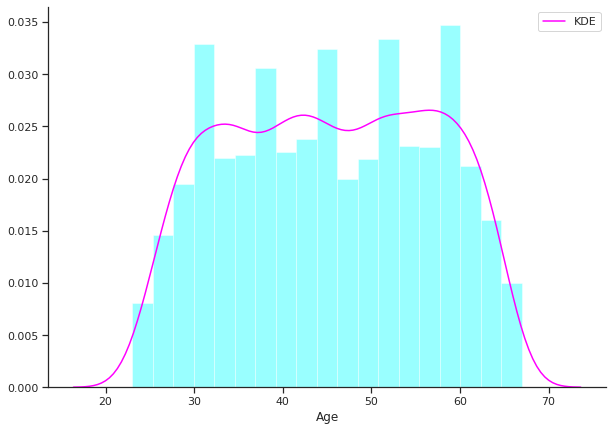

In [23]:
# Distribution Plot for Age attribute
sns.distplot(bank_data['Age'], hist_kws={"color":"cyan"}, kde_kws={"color":"magenta", "label":"KDE"})
sns.despine()

From the above graph, we can see that **Age** attribute seems to have a normal distribution.

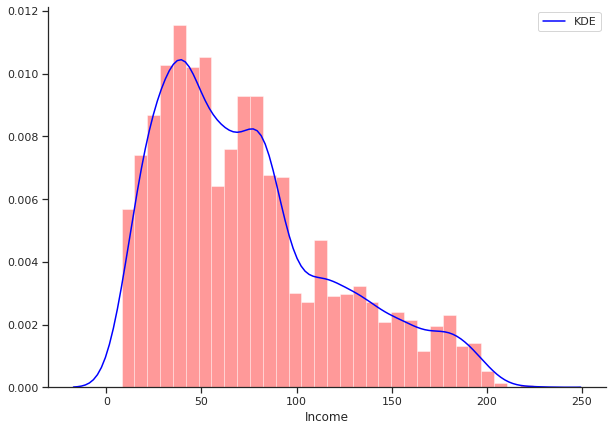

In [24]:
# Distribution Plot for Income attribute
sns.distplot(bank_data['Income'], hist_kws={"color":"red"}, kde_kws={"color":"blue", "label":"KDE"})
sns.despine()

From the above graph, we can see that **Income** attribute seems to have a distribution skewed to the right.

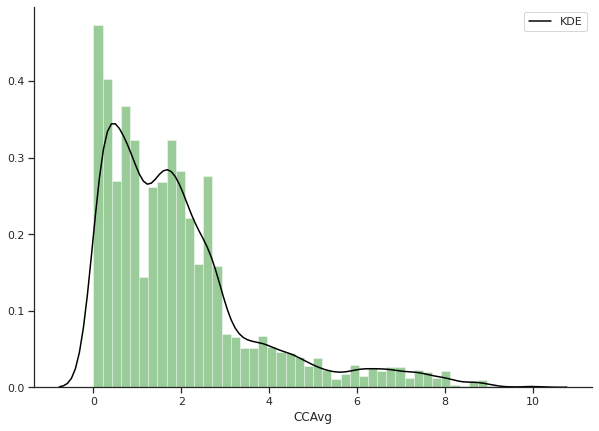

In [25]:
# Distribution Plot for CCAvg attribute
sns.distplot(bank_data['CCAvg'], hist_kws={"color":"green"}, kde_kws={"color":"black", "label":"KDE"})
sns.despine()

From the above graph, we can see that **CCAvg** attribute seems to have a distribution skewed to the right.

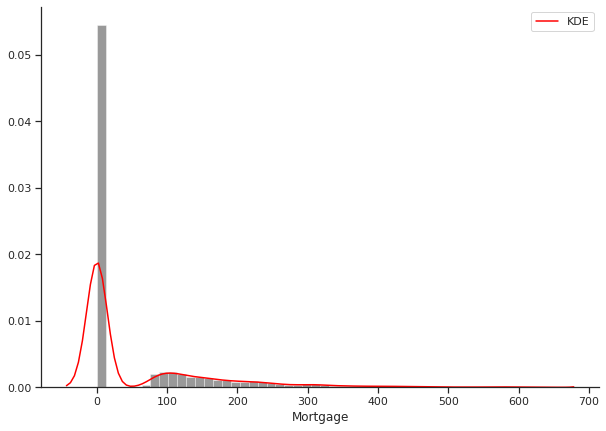

In [26]:
# Distribution Plot for Mortgage attribute
sns.distplot(bank_data['Mortgage'], hist_kws={"color":"black"}, kde_kws={"color":"red", "label":"KDE"})
sns.despine()

From the above graph, we can see that **Mortgage** attribute seems to have a distribution that is highly skewed to the right.

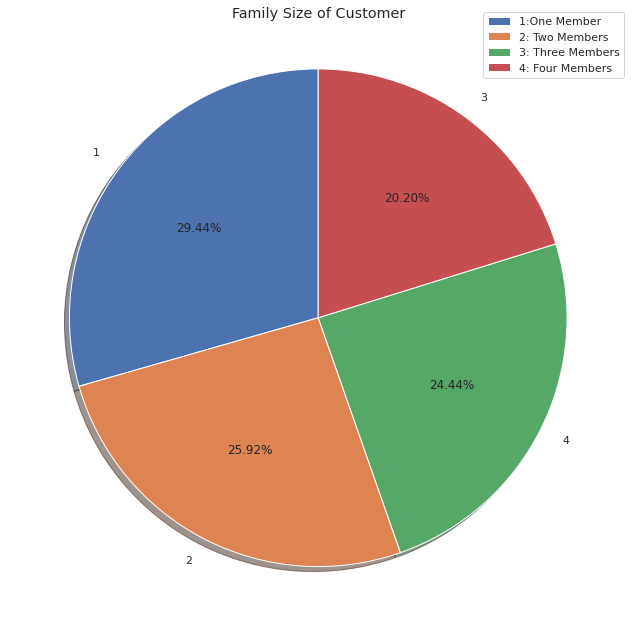

In [27]:
# Pie Plot for Family Attribute
edu = bank_data['Family'].value_counts()
label1 = ["1:One Member", "2: Two Members", "3: Three Members", "4: Four Members"]
edu.plot.pie(subplots=True, figsize=(10,9), label='', title="Family Size of Customer", autopct='%.2f%%', startangle = 90, shadow = True)
plt.legend(label1, loc="upper right")
plt.tight_layout()

From the above Pie Plot for **Family** Attribute, we can see that,

*   **29.44%** of the Customers have 1 Family Member.
*   **25.92%** of the Customers have 2 Family Members.
*   **20.20%** of the Customers have 3 Family Members.
*   **24.44%** of the Customers have 4 Family Members.

Hence, we can say that majority of the customers have only 1 family member.

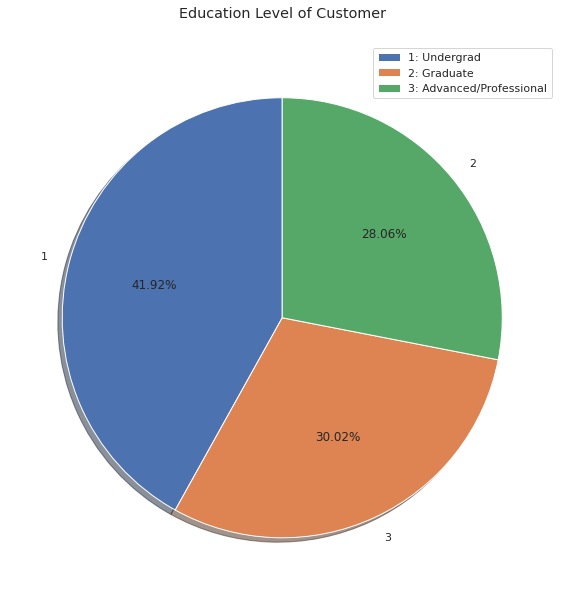

In [28]:
# Pie Plot for Education Attribute
edu = bank_data['Education'].value_counts()
label1 = ["1: Undergrad", "2: Graduate", "3: Advanced/Professional"]
edu.plot.pie(subplots=True, figsize=(8,9), label='', title="Education Level of Customer", autopct='%.2f%%', startangle = 90, shadow = True)
plt.legend(label1, loc="upper right")
plt.tight_layout()

From the above Pie Plot for **Education** Attribute, we can see that,

*   **41.92%** of the Customers are Undergrad.
*   **28.06%** of the Customers are Graduate.
*   **30.02%** of the Customers are Advanced/Professional.

Hence, we can say that majority of the customers are Undergrad. After that, the customers are Advanced/Professional and the rest of the customers are Graduates.

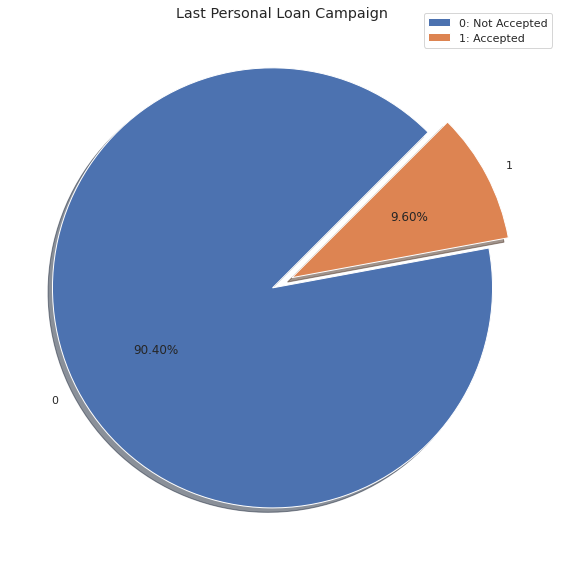

In [29]:
# Pie Plot for Personal Loan Attribute
sec_acc = bank_data['Personal Loan'].value_counts()
explodes = (0.05,0.05)
label1 = ["0: Not Accepted","1: Accepted"]
sec_acc.plot.pie(subplots=True, figsize=(8,8), label='', title="Last Personal Loan Campaign", autopct='%.2f%%', explode=explodes, shadow = True, startangle=45)
plt.legend(label1, loc="upper right")
plt.tight_layout()

From the above Pie Plot for **Personal Loan** Attribute, we can see that,

*   **9.60%** of the Customers accepted the Personal Loan in the last campaign.
*   **90.40%** of the Customers didn't accept the Personal Loan in the last campaign.

Hence, we can see that among these 5000 customers, only 480 (9.60%) customers accepted the personal loan that was
offered to them in the earlier campaign.

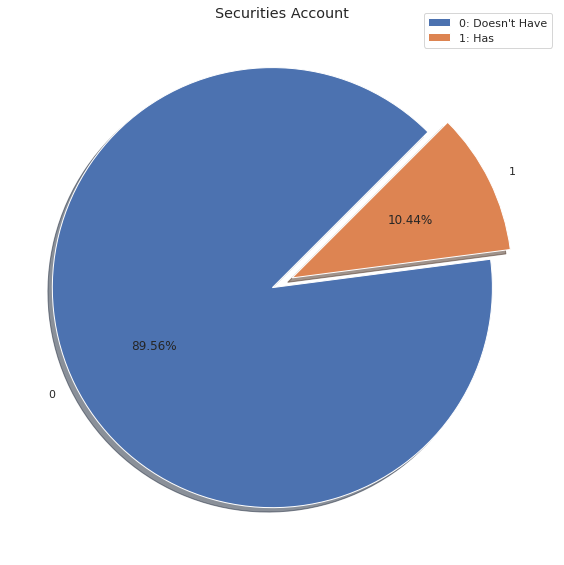

In [30]:
# Pie Plot for Securities Account Attribute
sec_acc = bank_data['Securities Account'].value_counts()
explodes = (0.05,0.05)
label1 = ["0: Doesn't Have","1: Has"]
sec_acc.plot.pie(subplots=True, figsize=(8,8), label='', title="Securities Account", autopct='%.2f%%', explode=explodes, shadow = True, startangle=45)
plt.legend(label1, loc="upper right")
plt.tight_layout()

From the above Pie Plot for **Securities Account** Attribute, we can see that,

*   **89.56%** of the Customers do not have a Securities Account.
*   **10.44%** of the Customers have a Securities Account.

Hence, we can say that very few customers have Securities Account.

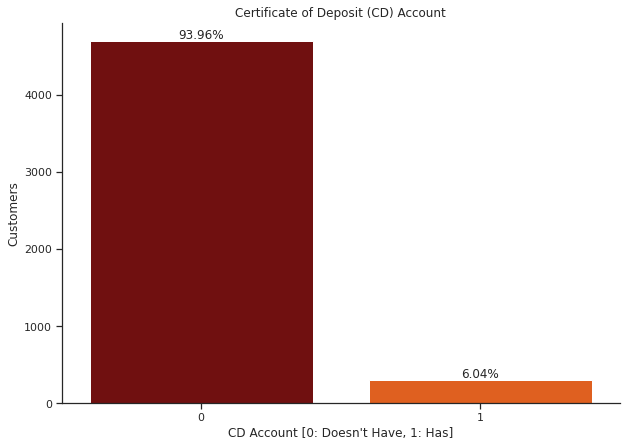

In [31]:
# Count Plot for CD Account Attribute
ax = sns.countplot(bank_data['CD Account'], palette='gist_heat')
plt.title('Certificate of Deposit (CD) Account')
plt.ylabel('Customers')
plt.xlabel("CD Account [0: Doesn't Have, 1: Has]")
sns.despine()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 25, '{:1.2f}%'.format(height/5000*100), ha="center")

From the above Count Plot for **CD Account** Attribute, we can see that,

*   **93.96%** of the Customers do not have a Certificate of Deposit (CD) Account.
*   **6.04%** of the Customers have a Certificate of Deposit (CD) Account.

Hence, we can say that very few customers have a Certificate of Deposit (CD) Account.

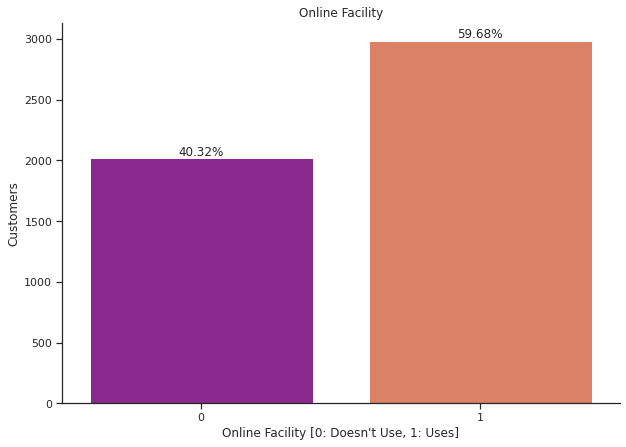

In [32]:
# Count Plot for Online Attribute
ax = sns.countplot(bank_data['Online'], palette='plasma')
plt.title('Online Facility')
plt.ylabel('Customers')
plt.xlabel("Online Facility [0: Doesn't Use, 1: Uses]")
sns.despine()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 25, '{:1.2f}%'.format(height/5000*100), ha="center")

From the above Count Plot for **Online** Attribute, we can see that,

*   **40.32%** of the Customers do not use Online Banking Facility.
*   **59.68%** of the Customers use Online Banking Facility.

Hence, we can say that many customers utilize the Online Banking Facility. 

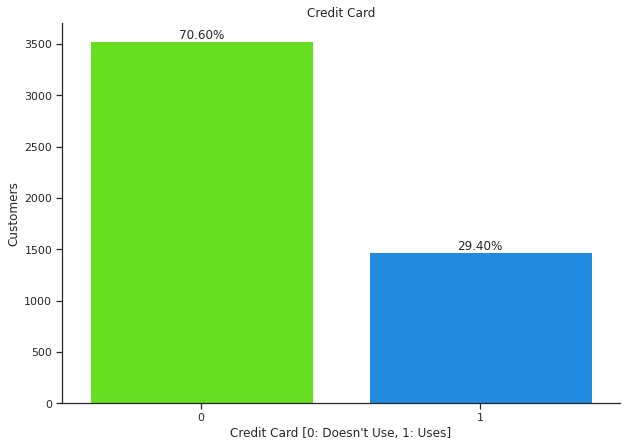

In [33]:
# Count Plot for CreditCard Attribute
ax = sns.countplot(bank_data['CreditCard'], palette='gist_rainbow')
plt.title('Credit Card')
plt.ylabel('Customers')
plt.xlabel("Credit Card [0: Doesn't Use, 1: Uses]")
sns.despine()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 25, '{:1.2f}%'.format(height/5000*100), ha="center")

From the above Count Plot for **CreditCard** Attribute, we can see that,

*   **70.60%** of the Customers do not use Credit Cards.
*   **29.40%** of the Customers use Credit Cards.

Hence, we can say that not many customers use Credit Cards.

### 3.6 Multivariate Analysis

In Multivariate Analysis, we analyse of more than one sttribute at a time.

In [34]:
# This code is used to set the size and theme of the graphs
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("ticks")

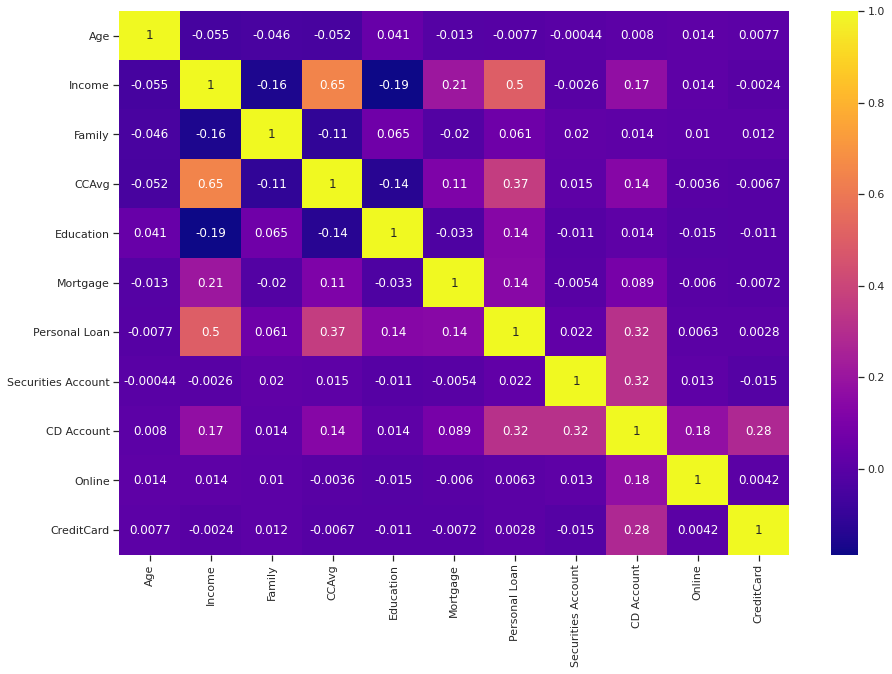

In [35]:
# This code is used to create a heatmap that shows the correlation between all
# the attributes of the database
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(bank_data.corr(), annot = True, cmap = 'plasma')

Here, we can see that Income and CCAvg as well as Income and Personal Loan have a little bit of correlation but not enough to be a problem.

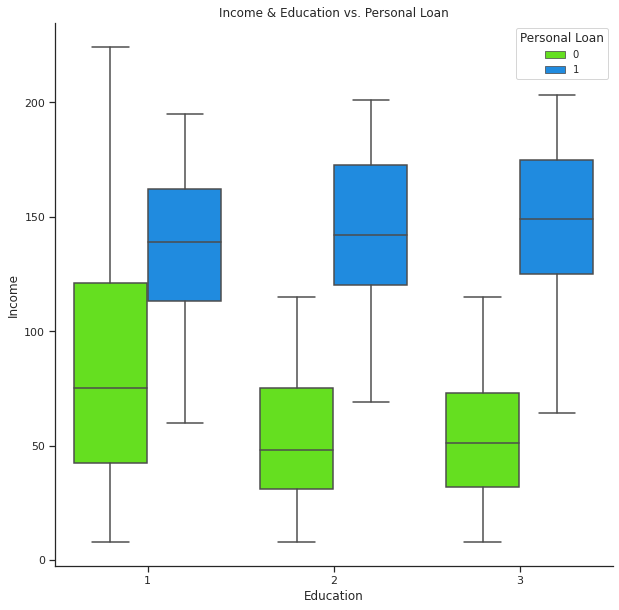

In [36]:
# Box Plot for Income & Education vs. Personal Loan
sns.boxplot(x='Education', y='Income', hue='Personal Loan', palette='gist_rainbow', data=bank_data)
plt.title('Income & Education vs. Personal Loan')
sns.despine()
plt.legend(title="Personal Loan", fontsize='small', fancybox=True, loc='upper right')

We can see from the above graph that across all three education levels, those customers with higher income are more likely to take personal loans.

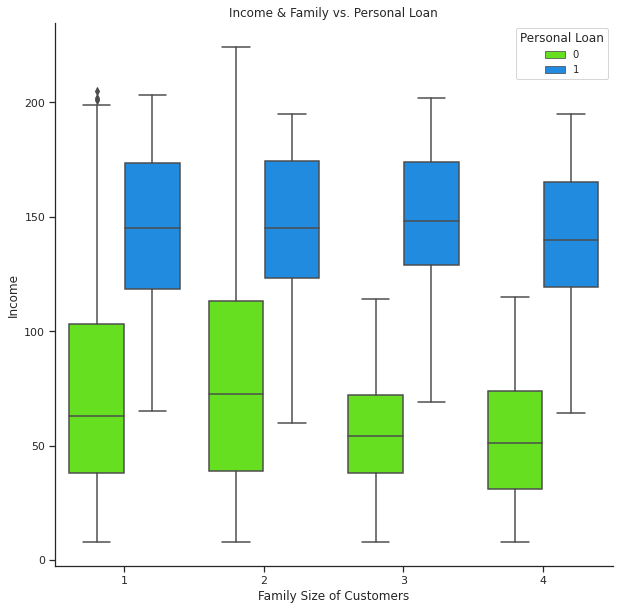

In [37]:
# Box Plot for Income & Family vs. Personal Loan
sns.boxplot(x='Family', y='Income', hue='Personal Loan', palette='gist_rainbow', data=bank_data)
plt.title('Income & Family vs. Personal Loan')
plt.xlabel('Family Size of Customers')
sns.despine()
plt.legend(title="Personal Loan", fontsize='small', fancybox=True, loc='upper right')

We can see from the above graph that across all four values of family size of customers, those customers with higher income are more likely to take personal loans.

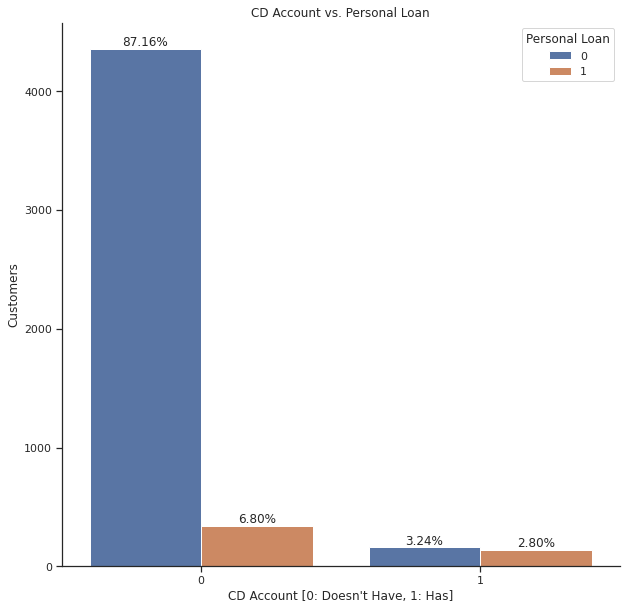

In [38]:
# Count Plot for CD Account vs. Personal Loan
ax = sns.countplot(x = 'CD Account', hue = 'Personal Loan', data = bank_data)
plt.title('CD Account vs. Personal Loan')
plt.ylabel('Customers')
plt.xlabel("CD Account [0: Doesn't Have, 1: Has]")
sns.despine()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 25, '{:1.2f}%'.format(height/5000*100), ha="center")

We can see that majority of the customers are not taking personal loans whether they have Certificate of Deposit (CD) Account or not. 

But, we can also see that the difference between the customers that are taking personal loans and those not taking personal loans is very small if the customer has a Certificate of Deposit (CD) Account.

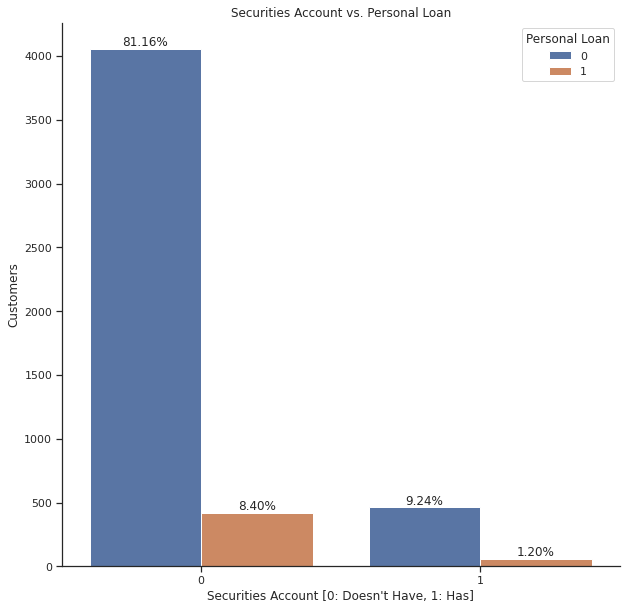

In [39]:
# Count Plot for Securities Account vs. Personal Loan
ax = sns.countplot(x = 'Securities Account', hue = 'Personal Loan', data = bank_data)
plt.title('Securities Account vs. Personal Loan')
plt.ylabel('Customers')
plt.xlabel("Securities Account [0: Doesn't Have, 1: Has]")
sns.despine()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 25, '{:1.2f}%'.format(height/5000*100), ha="center")

We can see that majority of the customers are not taking personal loans whether they have Securities Account or not. 

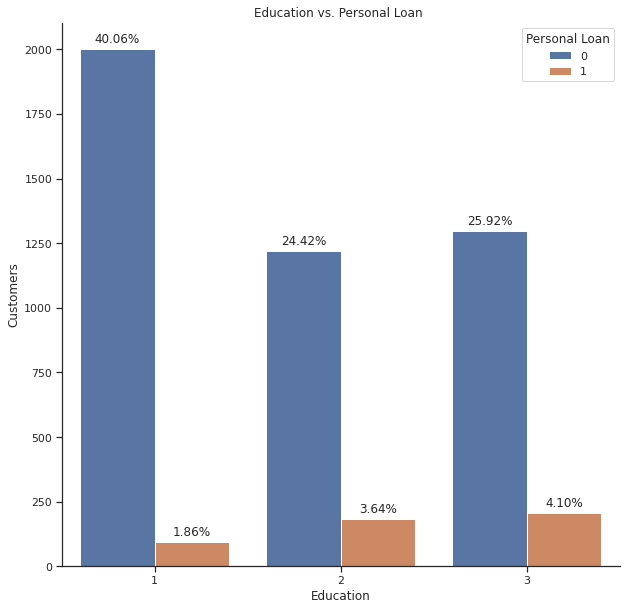

In [40]:
ax = sns.countplot(x = 'Education', hue = 'Personal Loan', data = bank_data)
plt.title('Education vs. Personal Loan ')
plt.ylabel('Customers')
sns.despine()
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 25, '{:1.2f}%'.format(height/5000*100), ha="center")

We can see that majority of the customers are not taking personal loans on any education level.

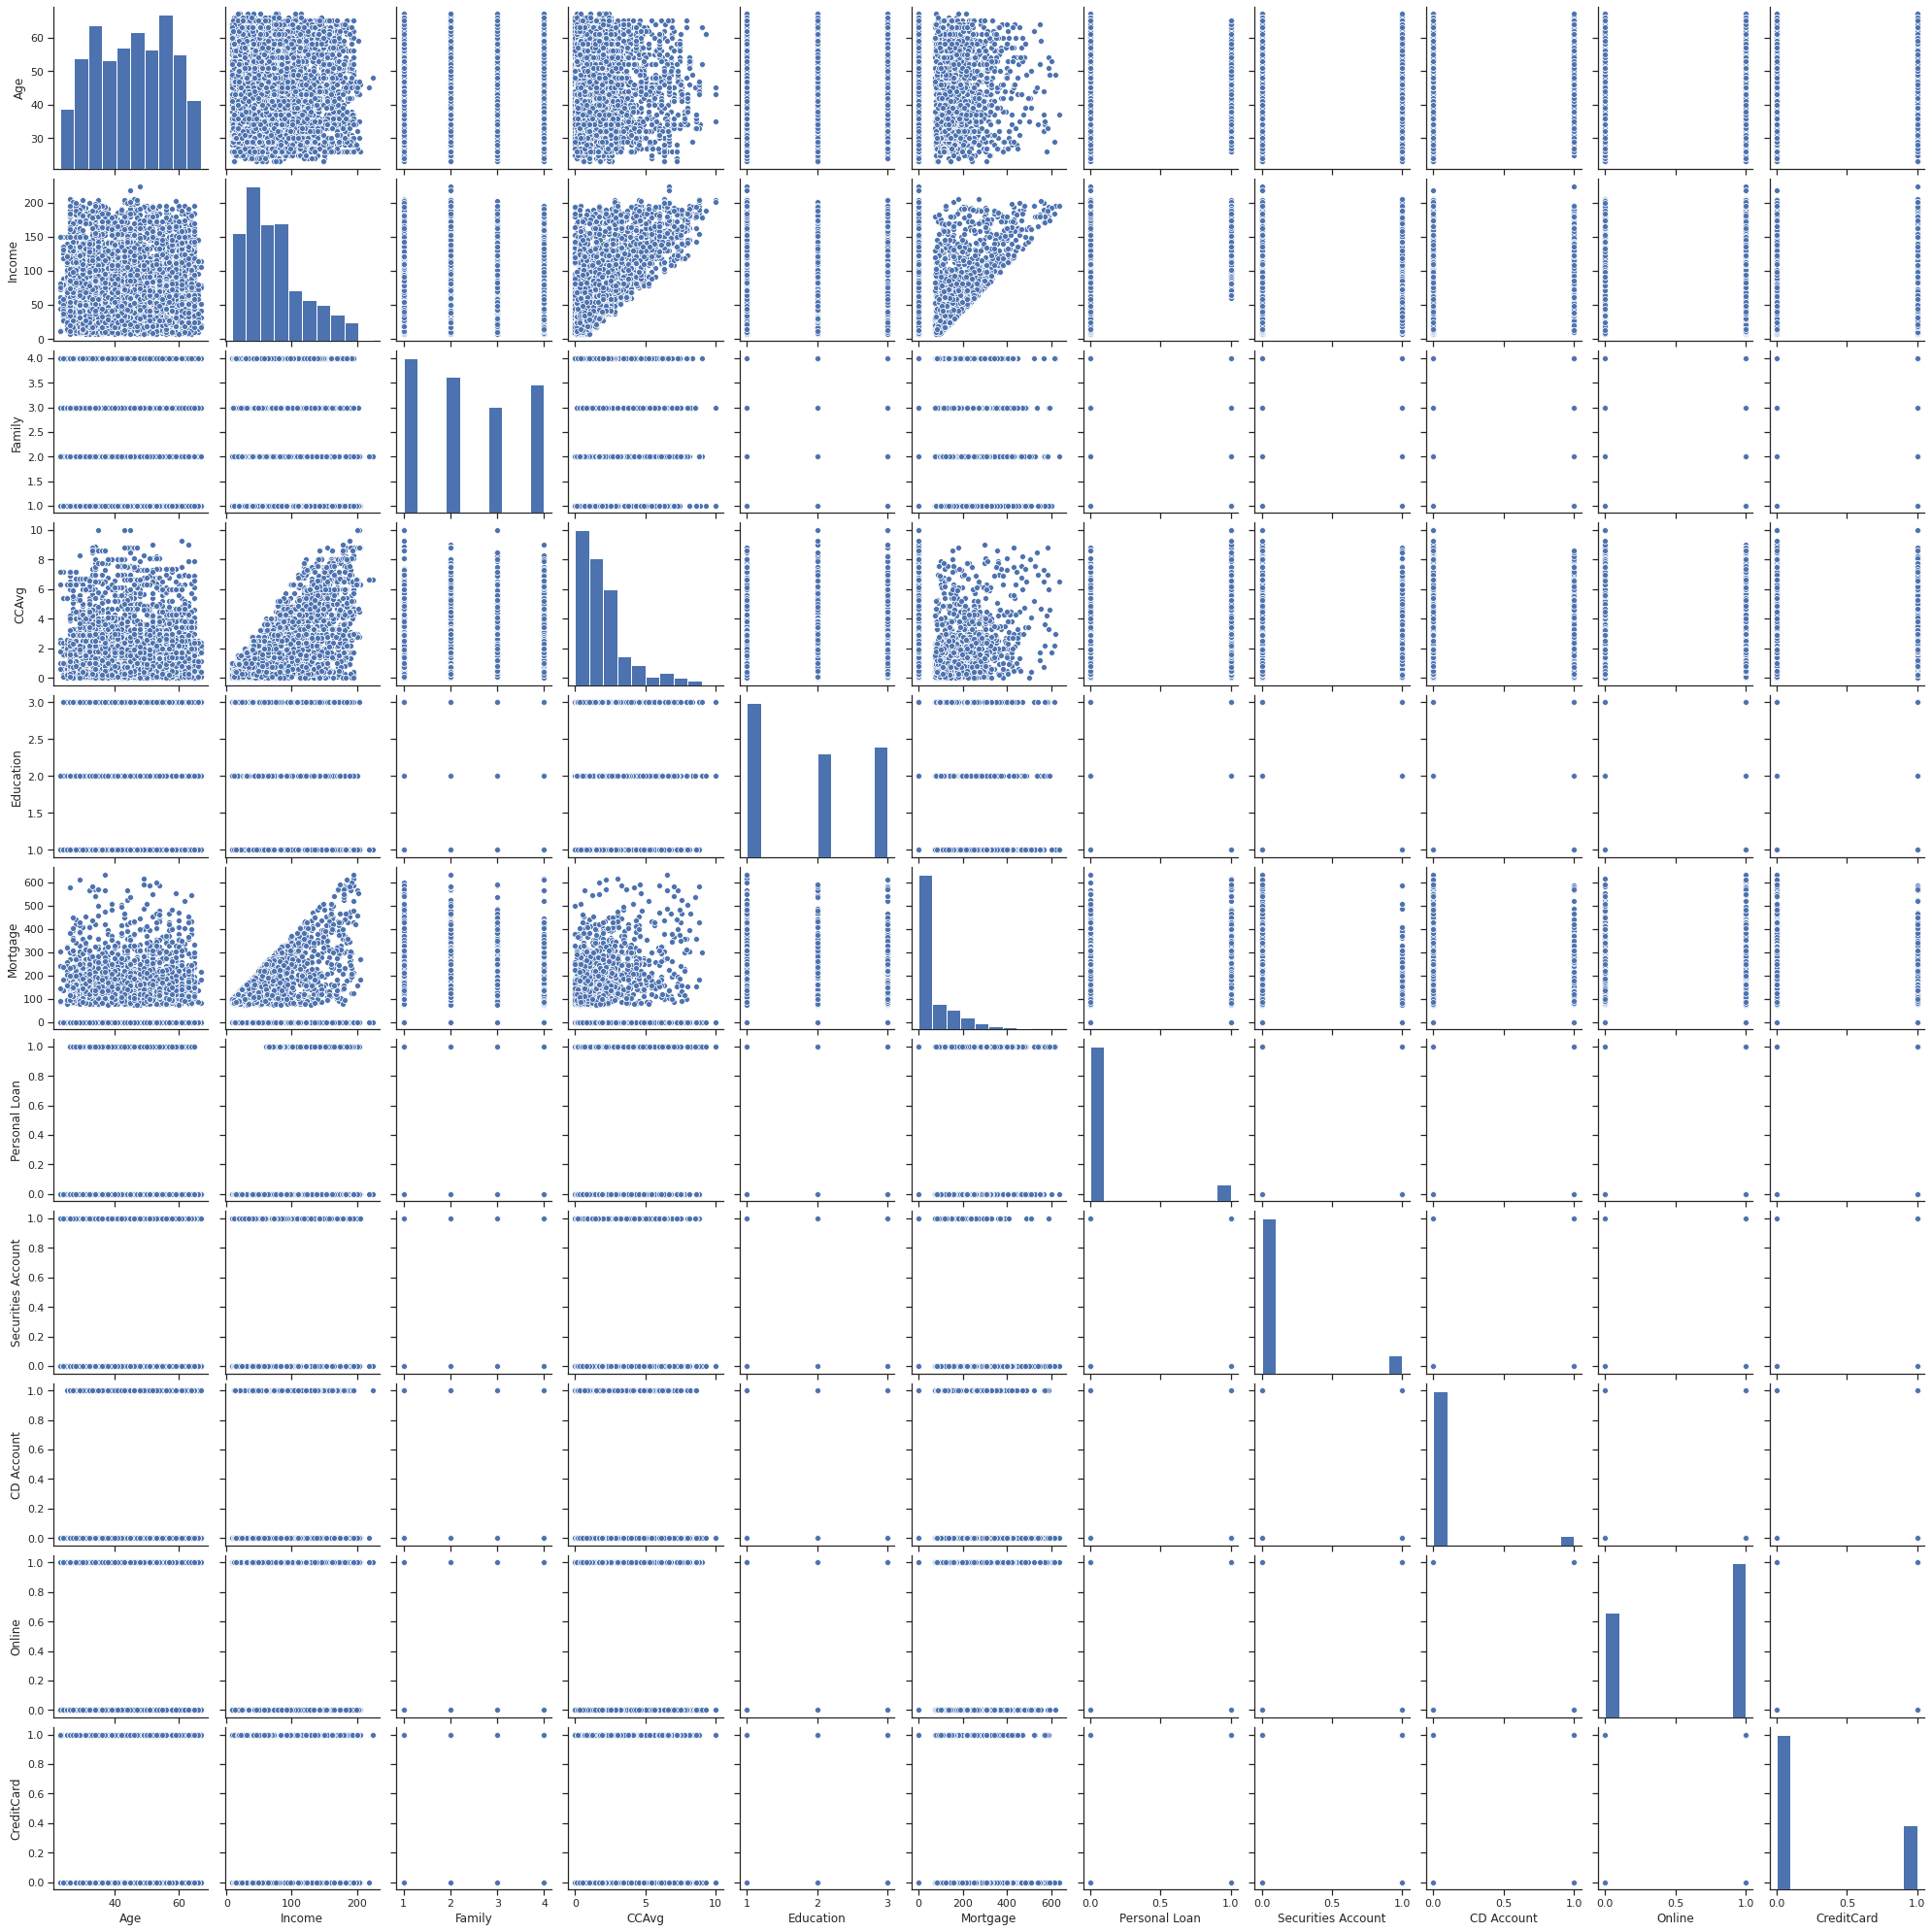

In [41]:
# Pair Plot for the dataset
sns.pairplot(bank_data)

Pair Plot draws scatterplots for joint relationships and histograms for univariate distributions.

## 4. Apply necessary transformations for the feature variables

In [42]:
# This code is used to set the size and theme of the graphs
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")

In [43]:
bank_data_X = bank_data.loc[:, bank_data.columns != "Personal Loan"]
bank_data_Y = bank_data[["Personal Loan"]]

The above code splits the dataset in 2 parts.

bank_data_X contains all attributes of the dataset except **Personal Loan** attribute. This will be the X value when training the model.

bank_data_Y contains the **Personal Loan** attribute. This will be the Y value when training the model.


In [44]:
# Importing PowerTransformer for applying transformations
from sklearn.preprocessing import PowerTransformer

As we saw before in the Distribution Plot for **Income** attribute and **CCAvg** attribute, the distribution was right skewed for both of them. We have to transform these attributes so that their distribution is normal. 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


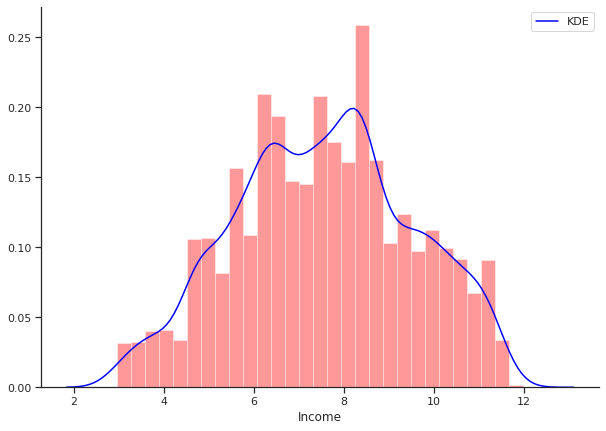

In [45]:
pow_transform = PowerTransformer(method = 'yeo-johnson', standardize = False)
pow_transform.fit(bank_data_X['Income'].values.reshape(-1, 1))
temp = pow_transform.transform(bank_data_X['Income'].values.reshape(-1, 1))
se1 = pd.Series(temp.flatten())
bank_data_X.loc[:, 'Income'] = se1
sns.distplot(bank_data_X['Income'], hist_kws={"color":"red"}, kde_kws={"color":"blue", "label":"KDE"})
sns.despine()

As we can see from the above graph, we used the **Yeo-Johnson** transformation on the **Income** attribute. After applying the transformation, the distribution of **Income** attribute is normal.

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


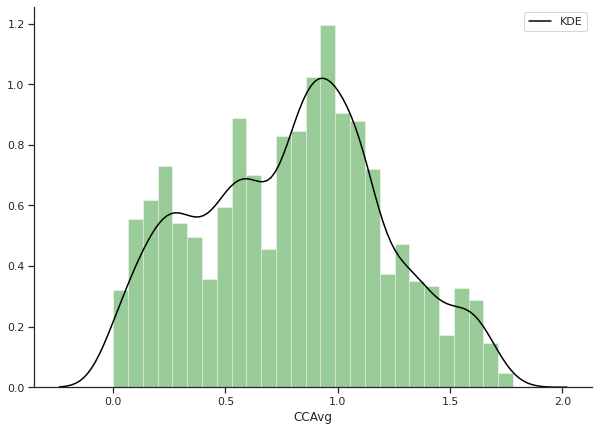

In [46]:
pow_transform = PowerTransformer(method = 'yeo-johnson', standardize = False)
pow_transform.fit(bank_data_X['CCAvg'].values.reshape(-1, 1))
temp = pow_transform.transform(bank_data_X['CCAvg'].values.reshape(-1, 1))
se1 = pd.Series(temp.flatten())
bank_data_X.loc[:, 'CCAvg'] = se1
sns.distplot(bank_data_X['CCAvg'], hist_kws={"color":"green"}, kde_kws={"color":"black", "label":"KDE"})
sns.despine()

As we can see from the above graph, we used the **Yeo-Johnson** transformation on the **CCAvg** attribute. After applying the transformation, the distribution of **CCAvg** attribute is normal.

As we saw before in the Distribution Plot for **Mortgage** attribute, the distribution was highly skewed. We have to transform this attribute so that the distribution is normal.

In [47]:
bin1 = [0, 100, 200, 300, 400, 500, 600, 700]
label1 = [0, 1, 2, 3, 4, 5, 6]
bank_data_X['Mortgage_New'] = pd.cut(bank_data_X['Mortgage'], bins = bin1, labels = label1, include_lowest = True)
bank_data_X.drop('Mortgage', axis = 1, inplace = True)
bank_data_X.head(10)

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,6.827583,4,0.845160,1,1,0,0,0,0
1,45,5.876952,3,0.814478,1,1,0,0,0,0
2,39,3.504287,1,0.633777,1,0,0,0,0,0
3,35,8.983393,1,1.107427,2,0,0,0,0,0
4,35,6.597314,4,0.633777,2,0,0,0,1,0
5,37,5.492854,4,0.322049,2,0,0,1,0,1
6,53,7.938412,2,0.814478,2,0,0,1,0,0
7,50,4.866205,1,0.253539,3,0,0,0,1,0
8,35,8.302424,3,0.442182,2,0,0,1,0,1
9,34,11.100150,1,1.722825,3,0,0,0,0,0


As we can see in the above code, we used Binning technique to transform the **Mortgage** attribute. We used this technique instead of Power Transformation because majority of the data is 0 and there is some discontinuity in the data.

We created a new attribute for mortgage to store the data after transformation and remove the current **Mortgage** attribute.

And as we can see from the graph, the distribution is now normalised.

## 5. Split the data into training and test set in the ratio of 70 : 30 respectively

In [48]:
# Importing the train_test_split to split the data for training and test
from sklearn.model_selection import train_test_split

In [49]:
# Split data in 70:30 ratio for training and test
train_X, test_X, train_Y, test_Y = train_test_split(bank_data_X, bank_data_Y, test_size = 0.3, stratify = bank_data_Y, random_state = 0)

In [50]:
# Resetting the indexes so that there are no NaN values after scaling the data
train_X.reset_index(drop = True, inplace = True)
train_Y.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)

In [51]:
# Importing StandardScalar for scaling the data
from sklearn.preprocessing import StandardScaler

Scaling is needed to standardize the data by removing the mean and scaling to unit variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [52]:
for index, col in enumerate(train_X.columns):
  sclr = StandardScaler()
  sclr.fit(train_X[[col]])

  arr_train = sclr.transform(train_X[[col]])
  train_X.loc[:, train_X.columns == col] = pd.Series(arr_train.flatten())

  arr_test = sclr.transform(test_X[[col]])
  test_X.loc[:, test_X.columns == col] = pd.Series(arr_test.flatten())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## 6. Use Logistic Regression model to predict the likelihood of a customer buying personal loans

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

It is one of the simplest ML algorithms that can be used for various classification problems.

In [53]:
# Importing the function for applying the Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

# Importing functions for different metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score, roc_auc_score

In [54]:
# Converting the train and test dataset to numpy array
np_arr_train_X = train_X.values
np_arr_train_Y = train_Y.values
np_arr_test_X = test_X.values
np_arr_test_Y = test_Y.values

In [55]:
# Apply Logistic Regression Algorithm
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_1 = classifier1.predict(np_arr_train_X)
predict_test_X_1 = classifier1.predict(np_arr_test_X)

## 7. Print all the metrics related for evaluating the model performance

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

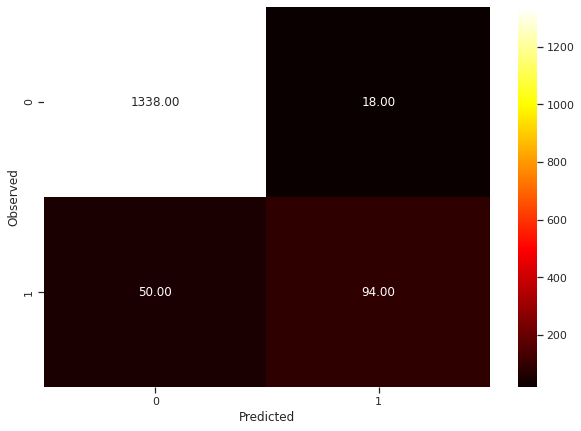

In [56]:
# Confusion Matrix for after applying Logistic Regression Algorithm to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_1.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1338**. This means that 1338 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 94**. This means that 94 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 50**. This means that 50 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 18**. This means that 18 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [57]:
# All the related metrics for evaluating the performance of Logistic Regression Algorithm

accuracy_train_X_1 = accuracy_score(np_arr_train_Y, predict_train_X_1)
accuracy_test_X_1 = accuracy_score(np_arr_test_Y, predict_test_X_1)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_1, accuracy_train_X_1 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_1, accuracy_test_X_1 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_1), recall_score(np_arr_test_Y, predict_test_X_1) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_1), precision_score(np_arr_test_Y, predict_test_X_1) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_1), f1_score(np_arr_test_Y, predict_test_X_1) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_1), roc_auc_score(np_arr_test_Y, predict_test_X_1) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_1))

Train Accuracy = 0.9568571428571429 (95.69%)
Test Accuracy = 0.9546666666666667 (95.47%)

Recall Score = 0.6527777777777778 (65.28%)

Precision Score = 0.8392857142857143 (83.93%)

F1 Score = 0.734375 (73.44%)

ROC AUC Score = 0.819751720747296 (81.98%)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



We can see that, for Logistic Regression, the **Train Accuracy is 95.69%** and **Test Accuracy is 95.47%**.

We have also shown other relevent metrices as well as the Classification Report.

## 8. Build various other classification algorithms and compare their performance

### 8.1 Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [58]:
# Importing the function for applying the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Apply Decision Tree Algorithm
classifier2 = DecisionTreeClassifier(random_state = 0, max_depth = 8)
classifier2.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_2 = classifier2.predict(np_arr_train_X)
predict_test_X_2 = classifier2.predict(np_arr_test_X)

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

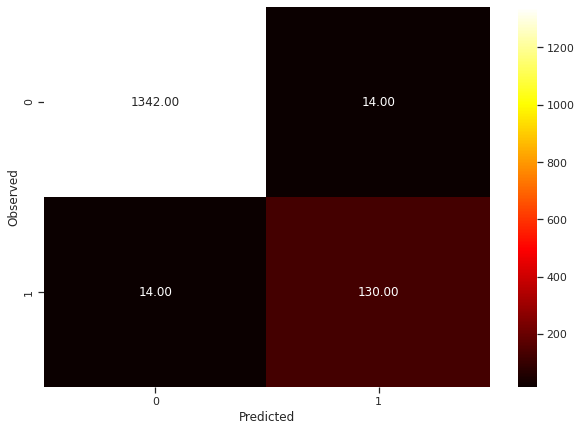

In [60]:
# Confusion Matrix for after applying Decision Tree Algorithm to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_2.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1342**. This means that 1338 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 130**. This means that 130 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 14**. This means that 14 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 14**. This means that 14 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [61]:
# All the related metrics for evaluating the performance of Decision Tree Algorithm
accuracy_train_X_2 = accuracy_score(np_arr_train_Y, predict_train_X_2)
accuracy_test_X_2 = accuracy_score(np_arr_test_Y, predict_test_X_2)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_2, accuracy_train_X_2 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_2, accuracy_test_X_2 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_2), recall_score(np_arr_test_Y, predict_test_X_2) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_2), precision_score(np_arr_test_Y, predict_test_X_2) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_2), f1_score(np_arr_test_Y, predict_test_X_2) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_2), roc_auc_score(np_arr_test_Y, predict_test_X_2) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_2))

Train Accuracy = 0.9957142857142857 (99.57%)
Test Accuracy = 0.9813333333333333 (98.13%)

Recall Score = 0.9027777777777778 (90.28%)

Precision Score = 0.9027777777777778 (90.28%)

F1 Score = 0.9027777777777778 (90.28%)

ROC AUC Score = 0.9462266470009832 (94.62%)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



We can see that, for Decision Tree, the **Train Accuracy is 99.57%** and **Test Accuracy is 98.13%**.

We have also shown other relevent metrices as well as the Classification Report.

### 8.2 Random Forest

Random forest is an ensemble machine learning algorithm.

Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

In [62]:
# Importing the function for applying the Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Apply Random Forest Algorithm
classifier3 = RandomForestClassifier(random_state = 0, max_depth = 10, n_estimators = 600)
classifier3.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_3 = classifier3.predict(np_arr_train_X)
predict_test_X_3 = classifier3.predict(np_arr_test_X)

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

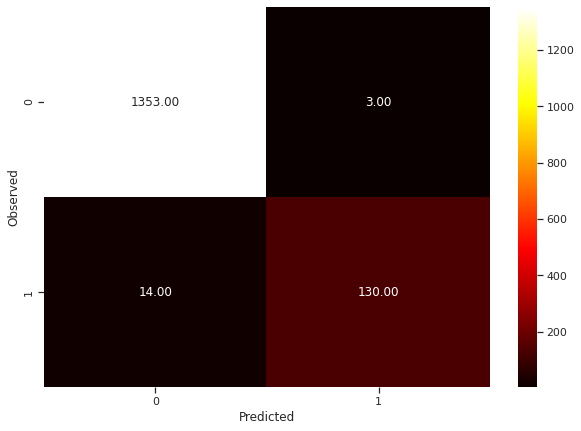

In [64]:
# Confusion Matrix for after applying Random Forest Algorithm to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_3.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1353**. This means that 1338 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 130**. This means that 130 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 14**. This means that 14 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 3**. This means that 3 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [65]:
# All the related metrics for evaluating the performance of Random Forest Algorithm

accuracy_train_X_3 = accuracy_score(np_arr_train_Y, predict_train_X_3)
accuracy_test_X_3 = accuracy_score(np_arr_test_Y, predict_test_X_3)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_3, accuracy_train_X_3 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_3, accuracy_test_X_3 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_3), recall_score(np_arr_test_Y, predict_test_X_3) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_3), precision_score(np_arr_test_Y, predict_test_X_3) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_3), f1_score(np_arr_test_Y, predict_test_X_3) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_3), roc_auc_score(np_arr_test_Y, predict_test_X_3) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_3))

Train Accuracy = 0.9991428571428571 (99.91%)
Test Accuracy = 0.9886666666666667 (98.87%)

Recall Score = 0.9027777777777778 (90.28%)

Precision Score = 0.9774436090225563 (97.74%)

F1 Score = 0.9386281588447652 (93.86%)

ROC AUC Score = 0.9502826941986233 (95.03%)

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



We can see that, for Random Forest, the **Train Accuracy is 99.91%** and **Test Accuracy is 95.87%**.

We have also shown other relevent metrices as well as the Classification Report.

### 8.3 Naive Bayes

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features.

P(A|B) = P(B|A) * P(A) / P(B)

Here,

P(A|B) is the posterior probability of class.

P(A) is the prior probability of class.

P(B|A) is the likelihood which is the probability of 
predictor given class.

P(B) is the prior probability of predictor.

In [66]:
# Importing the function for applying the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

In [67]:
# Apply Naive Bayes Algorithm
classifier4 = GaussianNB()
classifier4.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_4 = classifier4.predict(np_arr_train_X)
predict_test_X_4 = classifier4.predict(np_arr_test_X)

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

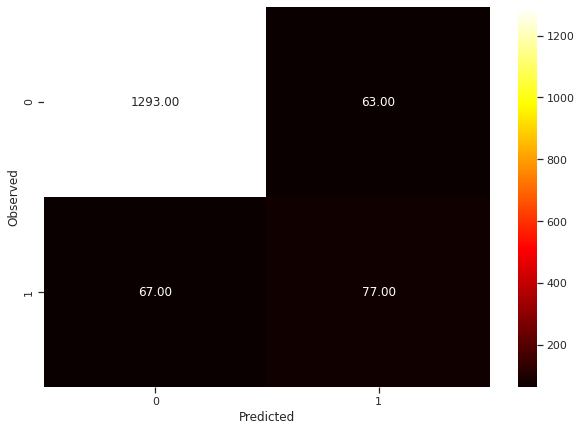

In [68]:
# Confusion Matrix for after applying Naive Bayes Algorithm to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_4.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1293**. This means that 1293 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 77**. This means that 77 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 67**. This means that 67 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 63**. This means that 63 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [69]:
# All the related metrics for evaluating the performance of Naive Bayes Algorithm

accuracy_train_X_4 = accuracy_score(np_arr_train_Y, predict_train_X_4)
accuracy_test_X_4 = accuracy_score(np_arr_test_Y, predict_test_X_4)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_4, accuracy_train_X_4 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_4, accuracy_test_X_4 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_4), recall_score(np_arr_test_Y, predict_test_X_4) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_4), precision_score(np_arr_test_Y, predict_test_X_4) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_4), f1_score(np_arr_test_Y, predict_test_X_4) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_4), roc_auc_score(np_arr_test_Y, predict_test_X_4) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_4))

Train Accuracy = 0.9085714285714286 (90.86%)
Test Accuracy = 0.9133333333333333 (91.33%)

Recall Score = 0.5347222222222222 (53.47%)

Precision Score = 0.55 (55.00%)

F1 Score = 0.5422535211267606 (54.23%)

ROC AUC Score = 0.7441310226155359 (74.41%)

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1356
           1       0.55      0.53      0.54       144

    accuracy                           0.91      1500
   macro avg       0.75      0.74      0.75      1500
weighted avg       0.91      0.91      0.91      1500



We can see that, for Naive Bayes, the **Train Accuracy is 90.86%** and **Test Accuracy is 91.33%**.

We have also shown other relevent metrices as well as the Classification Report.

### 8.4 Support Vector Machine (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [70]:
# Importing the function for applying Support Vector Machine (SVM) model
from sklearn.svm import SVC

In [71]:
# Apply SVM Model
classifier5 = SVC()
classifier5.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_5 = classifier5.predict(np_arr_train_X)
predict_test_X_5 = classifier5.predict(np_arr_test_X)

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

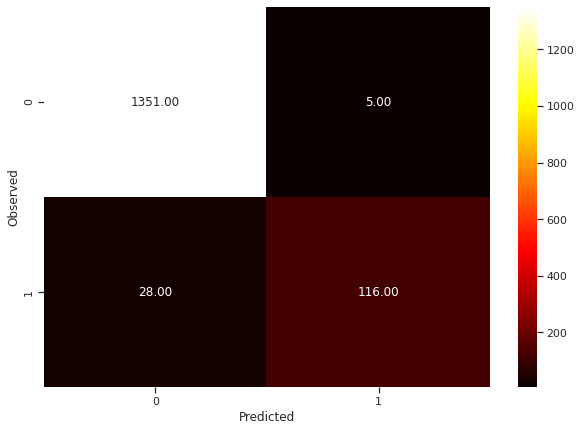

In [72]:
# Confusion Matrix for after applying SVM Model to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_5.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1351**. This means that 1351 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 116**. This means that 116 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 28**. This means that 28 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 5**. This means that 5 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [73]:
# All the related metrics for evaluating the performance of SVM Model

accuracy_train_X_5 = accuracy_score(np_arr_train_Y, predict_train_X_5)
accuracy_test_X_5 = accuracy_score(np_arr_test_Y, predict_test_X_5)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_5, accuracy_train_X_5 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_5, accuracy_test_X_5 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_5), recall_score(np_arr_test_Y, predict_test_X_5) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_5), precision_score(np_arr_test_Y, predict_test_X_5) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_5), f1_score(np_arr_test_Y, predict_test_X_5) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_5), roc_auc_score(np_arr_test_Y, predict_test_X_5) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_5))

Train Accuracy = 0.9797142857142858 (97.97%)
Test Accuracy = 0.978 (97.80%)

Recall Score = 0.8055555555555556 (80.56%)

Precision Score = 0.9586776859504132 (95.87%)

F1 Score = 0.8754716981132076 (87.55%)

ROC AUC Score = 0.9009341199606686 (90.09%)

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.96      0.81      0.88       144

    accuracy                           0.98      1500
   macro avg       0.97      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500



We can see that, for SVM Model, the **Train Accuracy is 97.97%** and **Test Accuracy is 97.80%**.

We have also shown other relevent metrices as well as the Classification Report.

### 8.5 K-Nearest Neighbors (KNN) Algorithm

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems.

In [74]:
# Importing the function for applying the K-Nearest Neighbors (KNN) Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [75]:
# Apply KNN Algorithm
classifier6 = KNeighborsClassifier(n_neighbors=3)
classifier6.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_6 = classifier6.predict(np_arr_train_X)
predict_test_X_6 = classifier6.predict(np_arr_test_X)

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

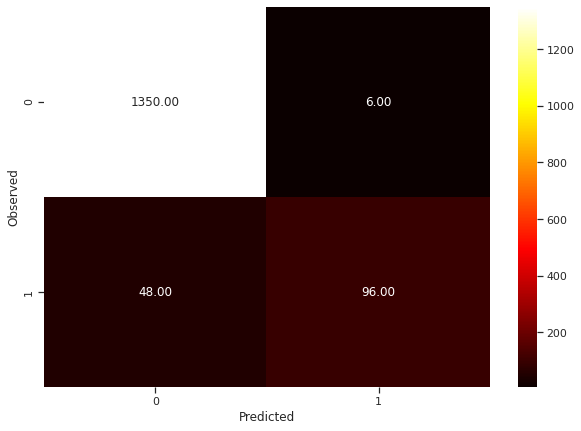

In [76]:
# Confusion Matrix for after applying KNN Algorithm to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_6.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1350**. This means that 1350 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 96**. This means that 96 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 48**. This means that 48 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 6**. This means that 6 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [77]:
# All the related metrics for evaluating the performance of KNN Algorithm

accuracy_train_X_6 = accuracy_score(np_arr_train_Y, predict_train_X_6)
accuracy_test_X_6 = accuracy_score(np_arr_test_Y, predict_test_X_6)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_6, accuracy_train_X_6 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_6, accuracy_test_X_6 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_6), recall_score(np_arr_test_Y, predict_test_X_6) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_6), precision_score(np_arr_test_Y, predict_test_X_6) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_6), f1_score(np_arr_test_Y, predict_test_X_6) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_6), roc_auc_score(np_arr_test_Y, predict_test_X_6) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_6))

Train Accuracy = 0.9777142857142858 (97.77%)
Test Accuracy = 0.964 (96.40%)

Recall Score = 0.6666666666666666 (66.67%)

Precision Score = 0.9411764705882353 (94.12%)

F1 Score = 0.7804878048780487 (78.05%)

ROC AUC Score = 0.8311209439528022 (83.11%)

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.94      0.67      0.78       144

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



We can see that, for KNN Algorithm, the **Train Accuracy is 97.77%** and **Test Accuracy is 96.40%**.

We have also shown other relevent metrices as well as the Classification Report.

### 8.6 Artificial Neural Network (ANN)

Artificial Neural Networks or ANN is an information processing paradigm that is inspired by the way the biological nervous system such as brain process information. It is composed of large number of highly interconnected processing elements (neurons) working in unison to solve a specific problem.

A single layer neural network is called a Perceptron. It gives a single output.

We will be using Multi-layer Perceptron (MLP) Classifier for implementing ANN.

In [78]:
# Importing the function for applying the Multi-layer Perceptron (MLP) Classifier
# for implementing Artificai Neural Networks (ANN)
from sklearn.neural_network import MLPClassifier

In [79]:
# Apply Multi-layer Perceptron (MLP) Classifier
classifier7 = MLPClassifier(hidden_layer_sizes = (5, 5, 5), random_state = 0, max_iter = 500)
classifier7.fit(np_arr_train_X, np_arr_train_Y.ravel())
predict_train_X_7 = classifier7.predict(np_arr_train_X)
predict_test_X_7 = classifier7.predict(np_arr_test_X)

Confusion Matrix


Text(0.5, 39.5, 'Predicted')

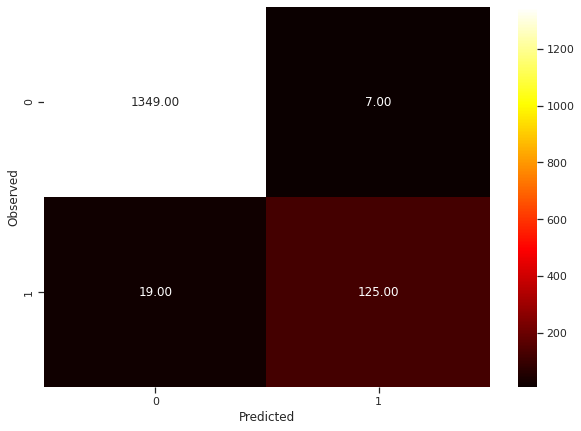

In [80]:
# Confusion Matrix for after MLP Classifier to the data
print("Confusion Matrix")
conf_matrix = confusion_matrix(np_arr_test_Y, predict_test_X_7.reshape(-1, 1))
sns.heatmap(conf_matrix, annot = True, fmt = '.2f', xticklabels = [0, 1], yticklabels = [0, 1], cmap = 'hot')
plt.ylabel('Observed')
plt.xlabel('Predicted')

From the above Confusion Matrix (read the matrix from left to right, and top to bottom), we can see that,

Total Values in Test = 1500

True Negetive = [0, 0]

True Positive = [1, 1]

False Negetive = [1, 0]

False Positive = [0, 1]

* **True Negetive = 1349**. This means that 1349 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 125**. This means that 125 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 19**. This means that 19 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 7**. This means that 7 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

In [81]:
# All the related metrics for evaluating the performance of MLP Classifier

accuracy_train_X_7 = accuracy_score(np_arr_train_Y, predict_train_X_7)
accuracy_test_X_7 = accuracy_score(np_arr_test_Y, predict_test_X_7)

print("Train Accuracy = {} ({:.2f}%)".format(accuracy_train_X_7, accuracy_train_X_7 * 100))
print("Test Accuracy = {} ({:.2f}%)".format(accuracy_test_X_7, accuracy_test_X_7 * 100))
print()
print("Recall Score = {} ({:.2f}%)".format(recall_score(np_arr_test_Y, predict_test_X_7), recall_score(np_arr_test_Y, predict_test_X_7) * 100))
print()
print("Precision Score = {} ({:.2f}%)".format(precision_score(np_arr_test_Y, predict_test_X_7), precision_score(np_arr_test_Y, predict_test_X_7) * 100))
print()
print("F1 Score = {} ({:.2f}%)".format(f1_score(np_arr_test_Y, predict_test_X_7), f1_score(np_arr_test_Y, predict_test_X_7) * 100))
print()
print("ROC AUC Score = {} ({:.2f}%)".format(roc_auc_score(np_arr_test_Y, predict_test_X_7), roc_auc_score(np_arr_test_Y, predict_test_X_7) * 100))
print()
print("Classification Report")
print(classification_report(np_arr_test_Y,predict_test_X_7))

Train Accuracy = 0.9857142857142858 (98.57%)
Test Accuracy = 0.9826666666666667 (98.27%)

Recall Score = 0.8680555555555556 (86.81%)

Precision Score = 0.946969696969697 (94.70%)

F1 Score = 0.9057971014492754 (90.58%)

ROC AUC Score = 0.931446656833825 (93.14%)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.95      0.87      0.91       144

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



We can see that, for MLP Classifier, the **Train Accuracy is 98.57%** and **Test Accuracy is 98.27%**.

We have also shown other relevent metrices as well as the Classification Report.

## 9. Business Understanding of the Model

The Objective of this project was to predict the likelihood of a liability customer buying personal loans.

To achieve this, first we imported our dataset and relevent libraries.

Then, we analysed the data and got following insights - 

* The dataset did not contain any NaN values.

* We found that the **ID** attribute in the dataset is not relevent to the data we require to predict i.e. **Personal Loan**, so we drop it from the dataset.

* We found that **Experience** attribute has some faulty data since there is a negetive **min** value which should not be possible. We also found that **Age** attribute and **Experience** attribute highly correlate, so we drop the **Experience** attribute.

* We found that **ZIP Code** attribute is a nominal value that has too many levels. If we use encoding, taking an example of One-Hot Encoding, we will have too many different columns and it will cause the problem of Multicollinearity as the new columns will highly depend on each other. So, to avoid this, we drop the **ZIP Code** attribute from the dataset.

* We also found that the **Income** attribute and **CCAvg** attribute are right skewed so we applied Yeo-Johnson Power Transformation to normalize them.

* We found that **Mortgage** attribute is highly skewed. Since there is a discontinuity in data as well as majority of the values are 0. Therefore, instead of Power Transformation, we used Binning Technique.

After the analysis, we split the data into training and testing in the ratio of 70:30 respectively.

After this, we used several different algorithms to make predictions.
>
---
---
>
---
**LOGISTIC REGRESSION**

---
Train Accuracy = 0.9568571428571429 (95.69%)

Test Accuracy = 0.9546666666666667 (95.47%)

Recall Score = 0.6527777777777778 (65.28%)

Precision Score = 0.8392857142857143 (83.93%)

F1 Score = 0.734375 (73.44%)

ROC AUC Score = 0.819751720747296 (81.98%)

Confusion Matrix - 

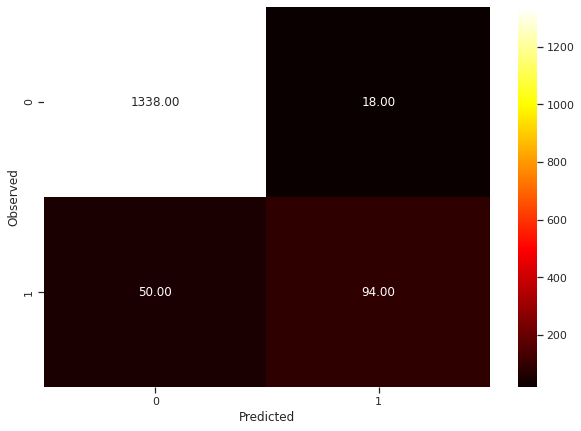

* **True Negetive = 1338**. This means that 1338 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 94**. This means that 94 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 50**. This means that 50 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 18**. This means that 18 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

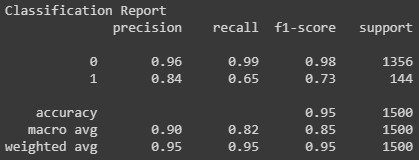

>
---
---
>
---
**DECISION TREE**

---
Train Accuracy = 0.9957142857142857 (99.57%)

Test Accuracy = 0.9813333333333333 (98.13%)

Recall Score = 0.9027777777777778 (90.28%)

Precision Score = 0.9027777777777778 (90.28%)

F1 Score = 0.9027777777777778 (90.28%)

ROC AUC Score = 0.9462266470009832 (94.62%)

Confusion Matrix - 

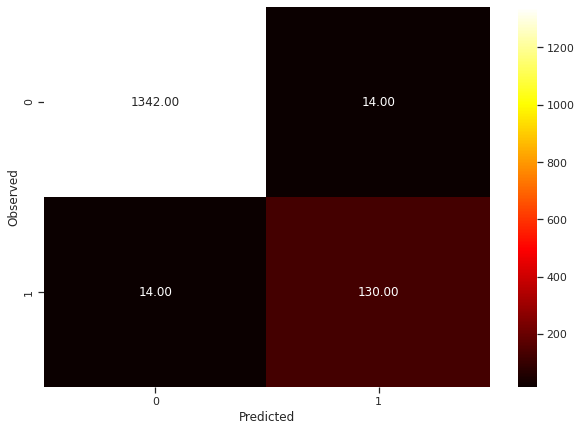

* **True Negetive = 1342**. This means that 1338 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 130**. This means that 130 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 14**. This means that 14 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 14**. This means that 14 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

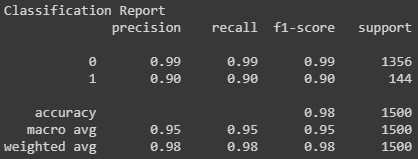

>
---
---
>
---
**RANDOM FOREST**

---
Train Accuracy = 0.9991428571428571 (99.91%)

Test Accuracy = 0.9886666666666667 (98.87%)

Recall Score = 0.9027777777777778 (90.28%)

Precision Score = 0.9774436090225563 (97.74%)

F1 Score = 0.9386281588447652 (93.86%)

ROC AUC Score = 0.9502826941986233 (95.03%)

Confusion Matrix - 

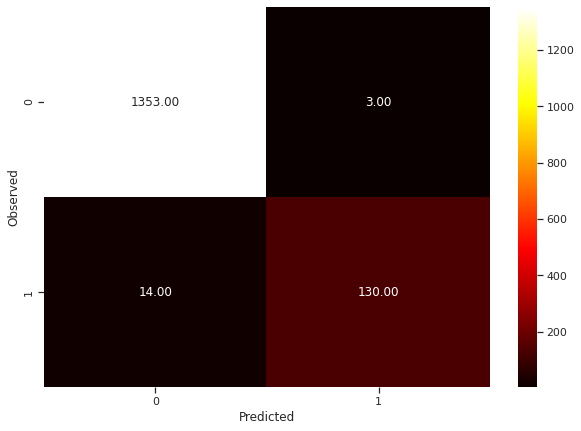

* **True Negetive = 1353**. This means that 1338 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 130**. This means that 130 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 14**. This means that 14 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 3**. This means that 3 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

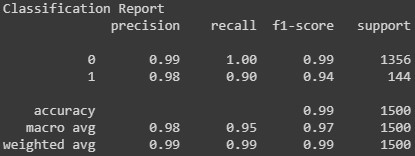

>
---
---
>
---
**NAIVE BAYES**

---
Train Accuracy = 0.9085714285714286 (90.86%)

Test Accuracy = 0.9133333333333333 (91.33%)

Recall Score = 0.5347222222222222 (53.47%)

Precision Score = 0.55 (55.00%)

F1 Score = 0.5422535211267606 (54.23%)

ROC AUC Score = 0.7441310226155359 (74.41%)

Confusion Matrix -

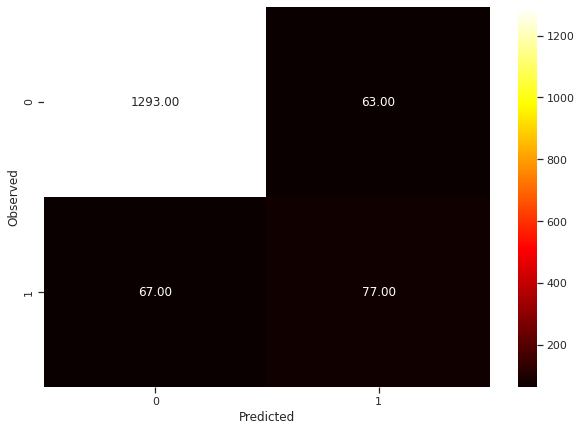

* **True Negetive = 1293**. This means that 1293 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 77**. This means that 77 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 67**. This means that 67 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 63**. This means that 63 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

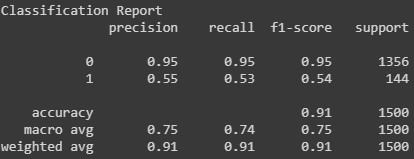

>
---
---
>
---
**SUPPORT VECTOR MACHINE (SVM)**

---
Train Accuracy = 0.9797142857142858 (97.97%)

Test Accuracy = 0.978 (97.80%)

Recall Score = 0.8055555555555556 (80.56%)

Precision Score = 0.9586776859504132 (95.87%)

F1 Score = 0.8754716981132076 (87.55%)

ROC AUC Score = 0.9009341199606686 (90.09%)

Confusion Matrix -

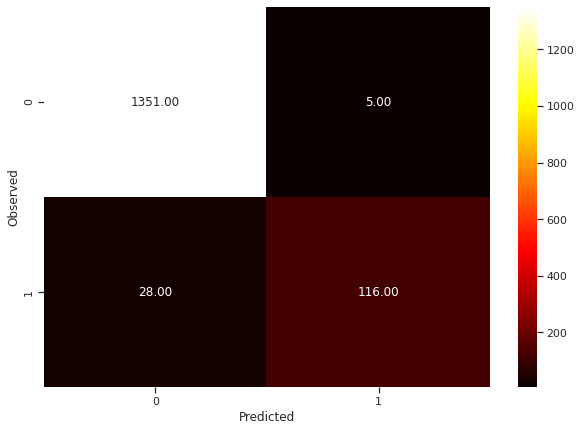

* **True Negetive = 1351**. This means that 1351 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 116**. This means that 116 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 28**. This means that 28 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 5**. This means that 5 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

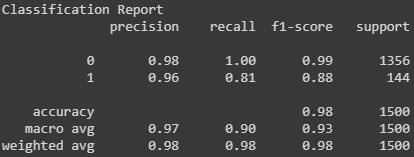

>
---
---
>
---
**K-NEAREST NEIGHBORS (KNN) ALGORITHM**

---
Train Accuracy = 0.9777142857142858 (97.77%)

Test Accuracy = 0.964 (96.40%)

Recall Score = 0.6666666666666666 (66.67%)

Precision Score = 0.9411764705882353 (94.12%)

F1 Score = 0.7804878048780487 (78.05%)

ROC AUC Score = 0.8311209439528022 (83.11%)

Confusion Matrix -

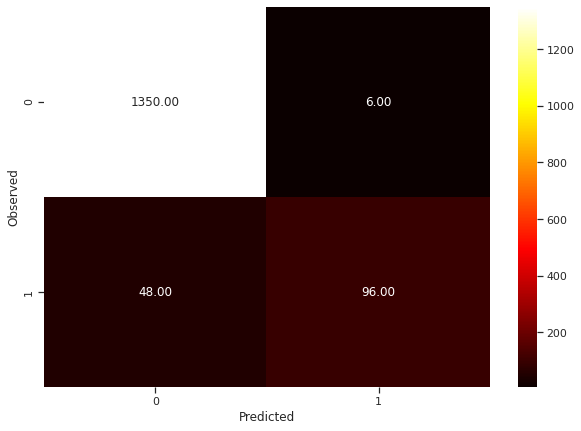

* **True Negetive = 1350**. This means that 1350 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 96**. This means that 96 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 48**. This means that 48 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 6**. This means that 6 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

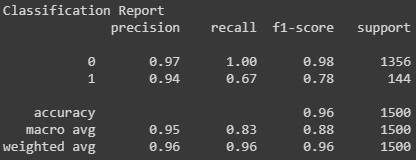

>
---
---
>
---
**ARTIFICIAL NEURAL NETWORK (ANN)**

---
Train Accuracy = 0.9857142857142858 (98.57%)

Test Accuracy = 0.9826666666666667 (98.27%)

Recall Score = 0.8680555555555556 (86.81%)

Precision Score = 0.946969696969697 (94.70%)

F1 Score = 0.9057971014492754 (90.58%)

ROC AUC Score = 0.931446656833825 (93.14%)

Confusion Matrix -

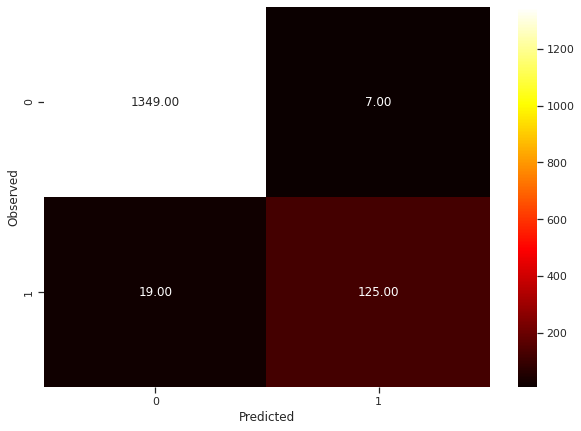

* **True Negetive = 1349**. This means that 1349 customers do not want to take Personal Loan and the model has also predected the same.

* **True Positive = 125**. This means that 125 customers want to take Personal Loan and the model has also predected the same.

* **False Negetive = 19**. This means that 19 customers want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan.

* **False Positive = 7**. This means that 7 customers do not want to take Personal Loan and the model has predicted that they want to take the Personal Loan.

Classification Report - 

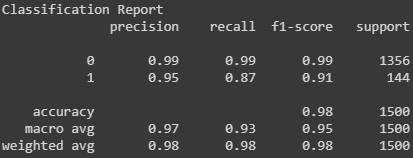

>
---
---
>

## Comparision of Models

Now we will compare these models.

Comarision of these models will be done by comparing the confusion matrix of the models or more specifically, the **False Negetive** part of the confusion matrix.

We are taking the **False Negetive** part of the confution matrix because, in this project's case, it shows the number of customers who want to take Personal Loan and the model has predicted that they do not want to take the Personal Loan. This is very bad from a business point of view. So we will check which model has the lowest number in the **False Negetive** part of the confusion matrix. The lower the number, the better the model. 

If the values of **False Negetive** are the same then we will compare the rest of the values of the confusion matrix. Those values are **False Positive**, **True Positive** and **True Negetive**.

We will also check the accuracy of the model but it is not the main comparision factor because the accuracy can be high but the confusion matrix may have a higher number in **False Negetive** part of the confusion matrix which is bad.

Measurement of Values - 

* False Negetive - Lower the Better

* False Positive - Lower the Better

* True Positive - Higher the Better

* True Negetive - Higher the Better

* Train Accuracy - Higher the Better

* Test Accuracy - Higher the Better

>
---
>

**LOGISTIC REGRESSION**

* True Negetive = 1338

* True Positive = 94

* False Negetive = 50

* False Positive = 18

* Train Accuracy = 0.9568571428571429 (95.69%)

* Test Accuracy = 0.9546666666666667 (95.47%)
>
---
>

**DECISION TREE**

* True Negetive = 1342

* True Positive = 130

* False Negetive = 14

* False Positive = 14

* Train Accuracy = 0.9957142857142857 (99.57%)

* Test Accuracy = 0.9813333333333333 (98.13%)
>
---
>

**RANDOM FOREST**

* True Negetive = 1353

* True Positive = 130

* False Negetive = 14

* False Positive = 3

* Train Accuracy = 0.9991428571428571 (99.91%)

* Test Accuracy = 0.9886666666666667 (98.87%)
>
---
>

**NAIVE BAYES**

* True Negetive = 1293

* True Positive = 77

* False Negetive = 67

* False Positive = 63

* Train Accuracy = 0.9085714285714286 (90.86%)

* Test Accuracy = 0.9133333333333333 (91.33%)
>
---
>

**SUPPORT VECTOR MACHINE (SVM)**

* True Negetive = 1351

* True Positive = 116

* False Negetive = 28

* False Positive = 5

* Train Accuracy = 0.9797142857142858 (97.97%)

* Test Accuracy = 0.978 (97.80%)
>
---
>

**K-NEAREST NEIGHBORS (KNN) ALGORITHM**

* True Negetive = 1350

* True Positive = 96

* False Negetive = 48

* False Positive = 6

* Train Accuracy = 0.9777142857142858 (97.77%)

* Test Accuracy = 0.964 (96.40%)
>
---
>

**ARTIFICIAL NEURAL NETWORK (ANN)**

* True Negetive = 1349

* True Positive = 125

* False Negetive = 19

* False Positive = 7

* Train Accuracy = 0.9857142857142858 (98.57%)

* Test Accuracy = 0.9826666666666667 (98.27%)
>
---
---
>

We can clearly see that, 

1. The best model is the **Random Forest**. It has the lowest **False Negetive** value of all models at **14**. While it has the same False Negetive value as the Decision Tree, its other values on the confusion matrix as well as its Train Accuracy and Test Accuracy is also better than the Decision Tree model.

2. The **Decision Tree** model comes a close second. It also has the lowest **False Negetive** value of all models at **14**. While it has the same False Negetive value as the Random Forest, its other values on the confusion matrix as well as its Train Accuracy and Test Accuracy is a little bit lower than the Random Forest model.

3. The **Artificial Neural Network (ANN)** model comes at third rank. It has the second lowest **False Negetive** value of all models at **19**.

4. At the fourth place, is the **Support Vector Machine (SVM)** model. It has a **False Negetive** value of **28**.

5. Next at fifth place is the **K-Nearest Neighbors (KNN) Algorithm**. It has a **False Negetive** value of **48**.

6. Next at sixth place is the **Logistic Regression** model. It has a **False Negetive** value of **50**.

7. At the last place is the **Naive Bayes** model. It has the least **False Negetive** value of all models at **67**.

>
---
---
>

## Final Conclusion

Thus we can conclude that the **Random Forest** model is the best Machine Learning Model for this dataset.